In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [23]:
df_levels = pd.read_csv('./data/list_levels.csv').sort_values(by='count', ascending=False)
df_tags = pd.read_csv('./data/list_tags.csv').sort_values(by='count', ascending=False)
df_attr = pd.read_csv('./data/list_attr_val.csv').sort_values(by='count', ascending=False)


## Getting the total by levels


The articles are often splitted in several parent levels. These contains different type of information. 

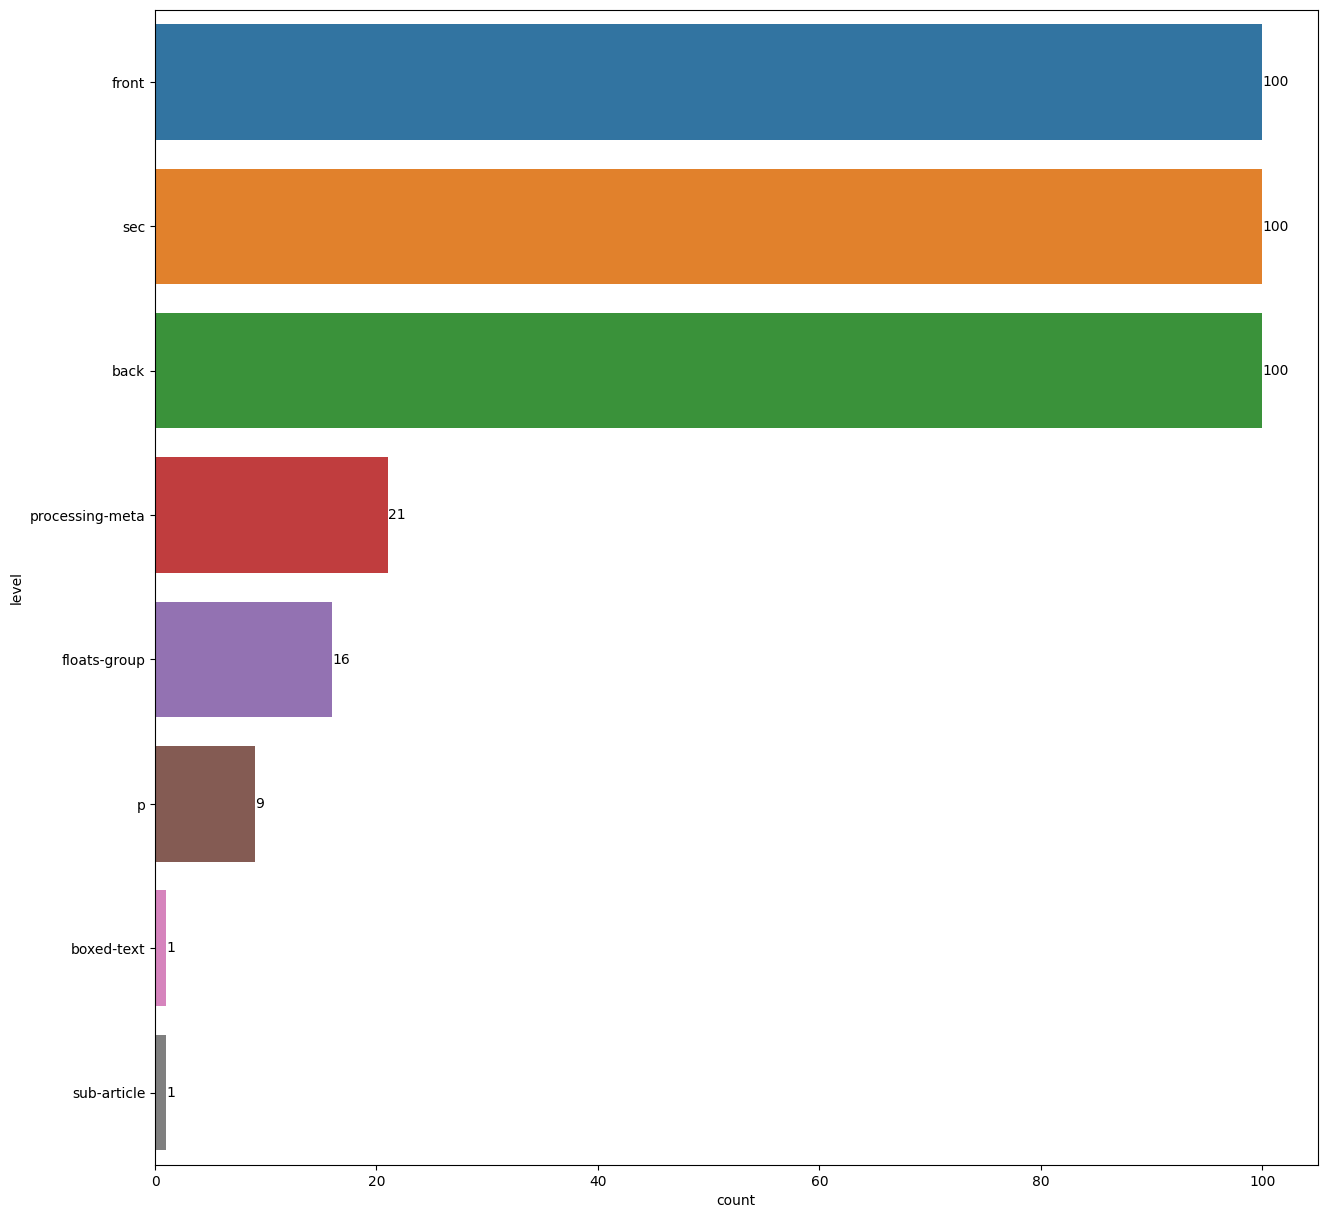

In [28]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(y=df_levels['level'], x=df_levels['count'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# Getting the total of tag per section

In [26]:
tag_count = df_tags[['level', 'tag', 'count']].groupby(['level', 'tag']).agg(['max'])['count'].reset_index().sort_values(by='max', ascending=False)
#level_tag_count['level-tag'] = level_tag_count['level'] + '_' + level_tag_count['tag']
to_plot = tag_count[['tag', 'level', 'max']].head(400)

tag_count

,level,tag,max
129,front,article-id,100
224,front,subject,100
207,front,pub-date,100
203,front,permissions,100
198,front,name,100
...,...,...,...
91,boxed-text,list-item,1
155,front,def-item,1
92,boxed-text,p,1
93,boxed-text,sec,1


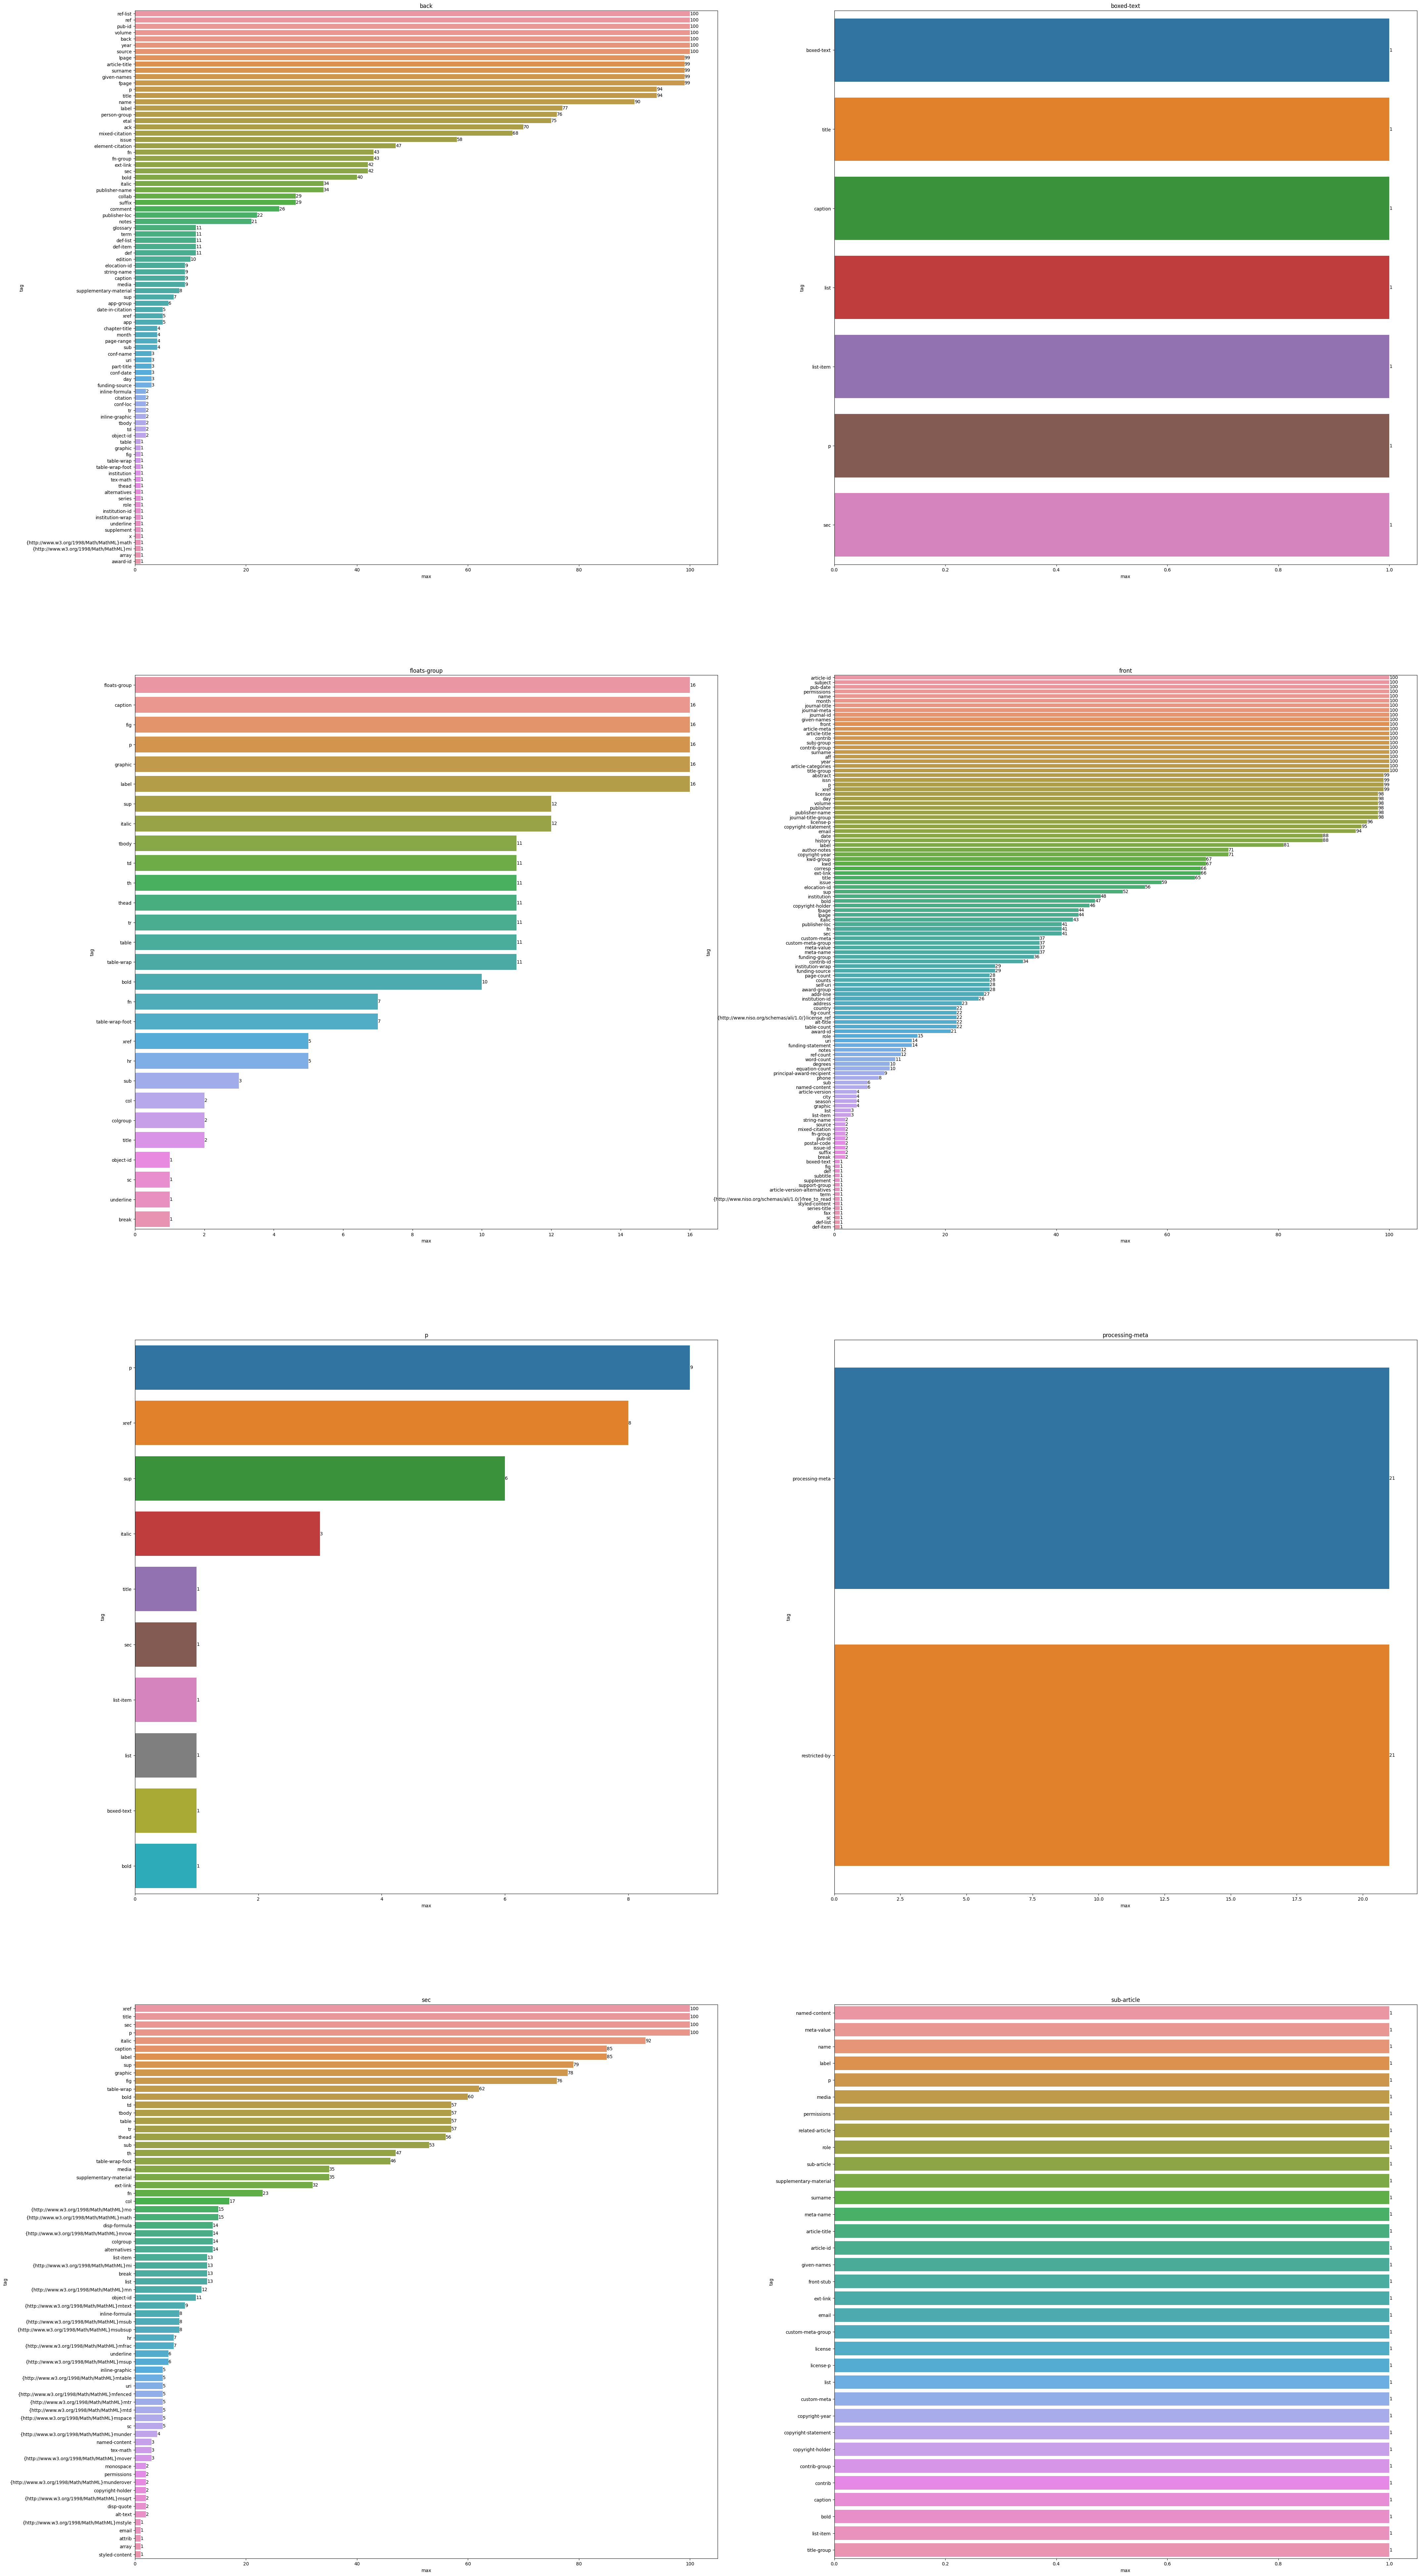

In [27]:
level_unique = len(to_plot['level'].unique())
n_col = 2
n_row = math.ceil(level_unique/n_col)
to_plot = to_plot

fig, axes = plt.subplots(n_row,n_col, figsize=(50,100))

n = 0
i = 0
for (level, grp) in to_plot.groupby("level"):
    sns.barplot(y="tag", 
                x="max", 
                data=grp,
                #order=grp.sort_values('max'),
                ax=axes[i,n], 
                orient='h')
    
    axes[i, n].set_title(f"{level}")
    axes[i, n].bar_label(axes[i, n].containers[0])
    n+=1
    if n > n_col-1:
        n=0
        i+=1
if n == 1:
    axes[i, n].remove()
plt.show()

# Getting the attr and attr_value for the level sec and tag sec 

In [34]:
sec_attr_max = df_attr[(df_attr['level'] == 'sec') & (df_attr['tag'] == 'sec')].groupby(['attr', 'attr_val'])['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
sec_attr_max#['attr_val']#.unique()

,attr,attr_val,max
527,sec-type,results,42
529,sec-type,supplementary-material,35
516,sec-type,discussion,35
525,sec-type,materials|methods,31
520,sec-type,intro,24
...,...,...,...
187,id,s2.4,1
186,id,s2.3,1
185,id,s2.2,1
184,id,s2.1,1


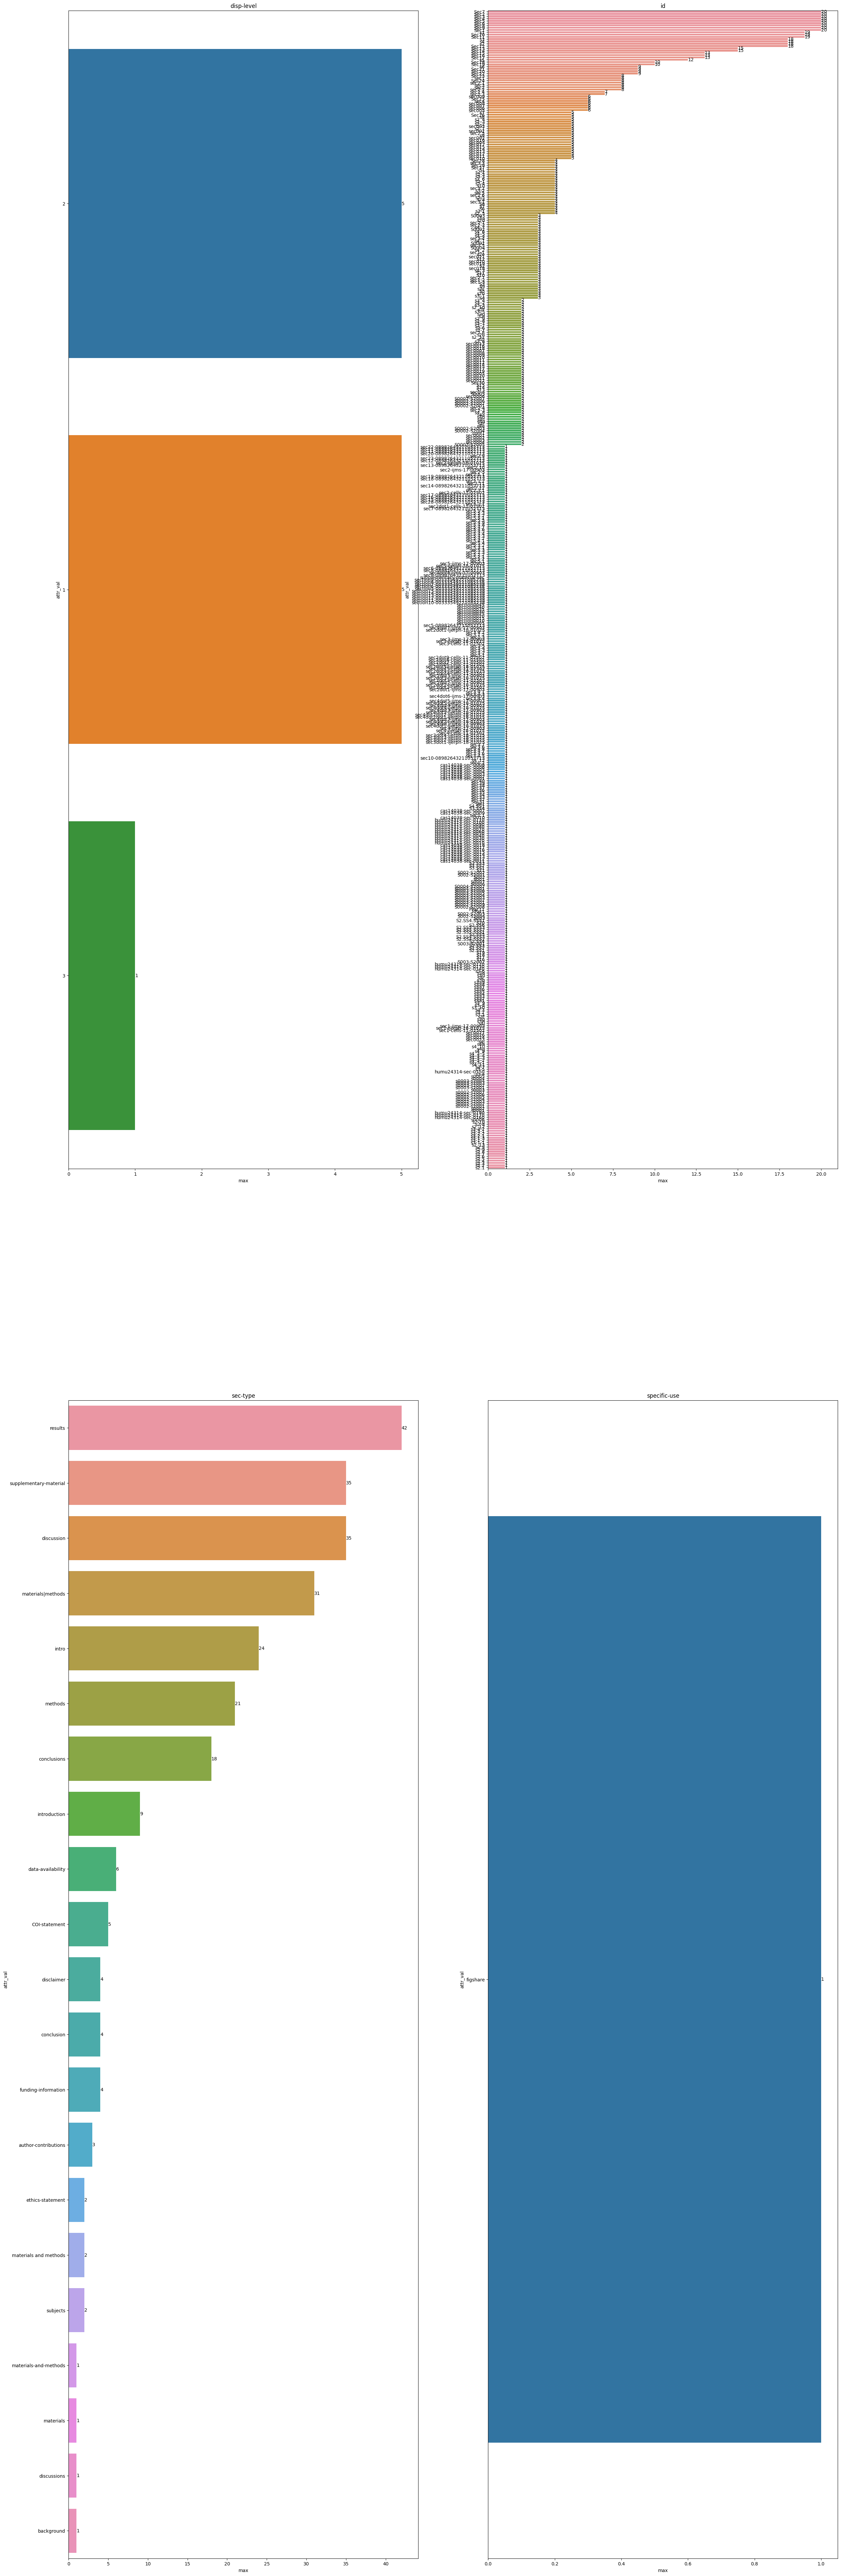

In [35]:
level_unique = len(sec_attr_max['attr'].unique())
n_col = 2
n_row = math.ceil(level_unique/n_col)
to_plot = sec_attr_max

fig, axes = plt.subplots(n_row,n_col, figsize=(30,100))

n = 0
i = 0
for (level, grp) in to_plot.groupby("attr"):
    sns.barplot(y="attr_val", 
                x="max", 
                data=grp,
                #order=grp.sort_values('max'),
                ax=axes[i,n], 
                orient='h')
    
    axes[i, n].set_title(f"{level}")
    axes[i, n].bar_label(axes[i, n].containers[0])
    n+=1
    if n > n_col-1:
        n=0
        i+=1
if n == 1:
    axes[i, n].remove()
plt.show()

# Getting the attr and attr_value for the tag sec and attr sec-type

In [37]:
sec_sec_type_max = df_attr[(df_attr['level'] == 'sec') & (df_attr['tag'] == 'sec') & (df_attr['attr'] == 'sec-type')].groupby('attr_val')['count'].agg(['max']).reset_index().sort_values(by='max', ascending=False)
sec_sec_type_max#['attr_val']#.unique()

,attr_val,max
18,results,42
20,supplementary-material,35
7,discussion,35
16,materials|methods,31
11,intro,24
17,methods,21
4,conclusions,18
12,introduction,9
5,data-availability,6
0,COI-statement,5


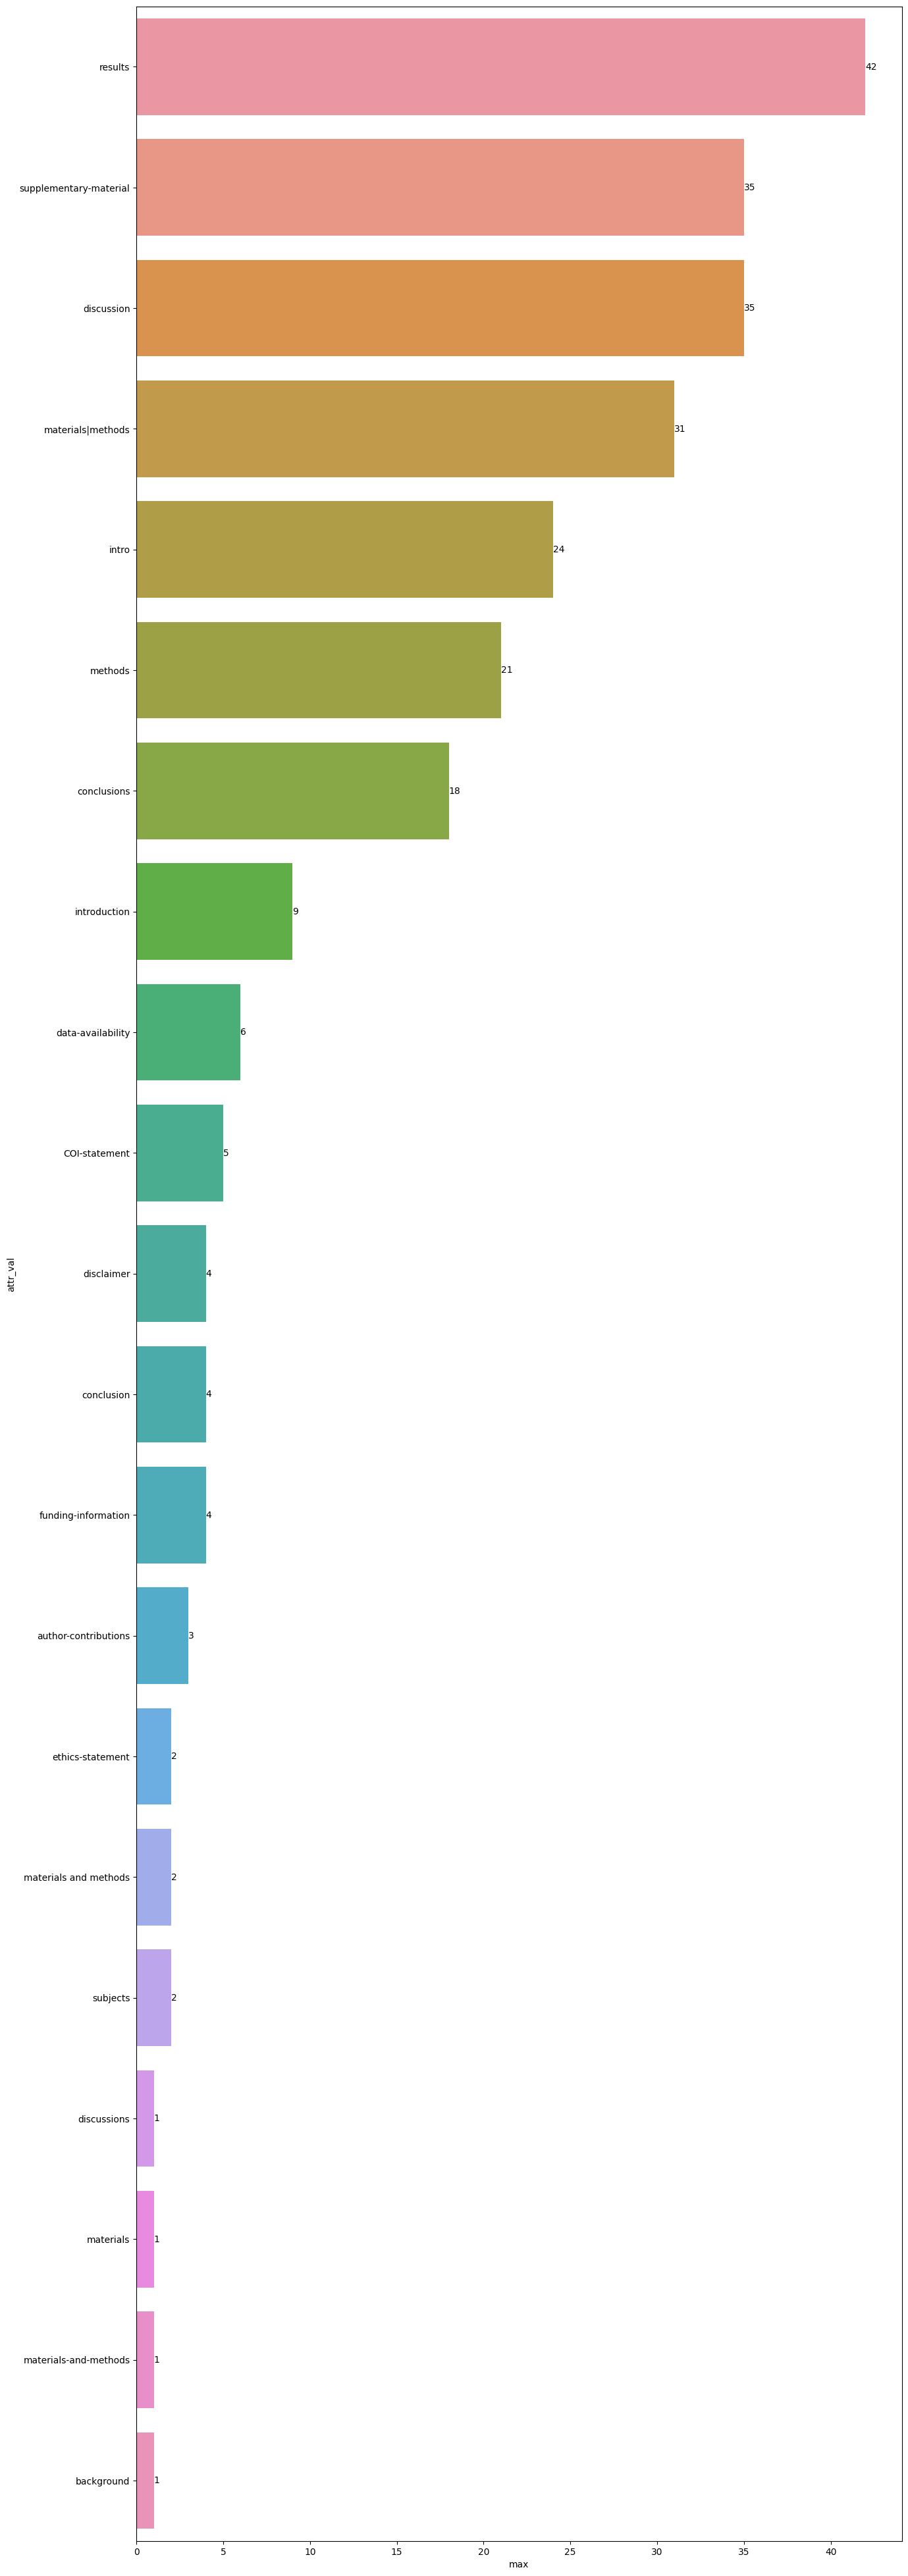

In [38]:
fig, ax = plt.subplots(figsize=(15,50))
ax = sns.barplot(y=sec_sec_type_max['attr_val'], x=sec_sec_type_max['max'], orient='h')
ax.bar_label(ax.containers[0])
plt.show()

# Getting the attr and attr_value for the level front 